# Assignment No 01 for CS 871 (Machine Learning)

Submitted by: Muhammad Salman Akhtar Registration No: 398895

## Question No 01

In [72]:
# Import the requisite modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

def GetScale(X):
    scale = StandardScaler()
    scaledX = scale.fit_transform(X)
    scaledX[:,0] = 1.0
    return scale, scaledX

def CalculateHypothesis(X,theta):
    YPredicted = np.dot(X,theta)
    return YPredicted
def CalculateCostFunction(X,Y,YPredicted):
    cost = 1/(len(X))*np.sum(np.square(YPredicted - Y))
    cost = cost/2
    return cost
def CalculateDerivativesofCostFunction(X,Y,YPredicted):
    deltaTheta = np.zeros(theta.shape)
    for i in range(len(deltaTheta)):
        diffPredict = YPredicted-Y
        prodX = np.multiply(diffPredict,X[:,i].reshape(len(X),1))
        deltaTheta[i] = 1/(len(X))*np.sum(prodX)
    return deltaTheta
def UpdateParameters(theta, deltaTheta, alpha):
    tempTheta = theta - alpha*deltaTheta
    theta = tempTheta
    return theta
def CalculateGradientDescent(X,Y,theta,alpha,iterations):
    cost = []
    for i in range(iterations):
        YPredicted = CalculateHypothesis(X,theta)
        cost.append(CalculateCostFunction(X,Y,YPredicted))
        deltaTheta = CalculateDerivativesofCostFunction(X,Y,YPredicted)
        theta = UpdateParameters(theta, deltaTheta, alpha)
        if i%100==0:
            print("Cost after " + str(i) + " iterations is: " + str(cost[i]))
    return cost,theta

In [73]:
# Data set formulation
X = np.array([[1,1989],[1,1990],[1,1991],[1,1992],[1,1993],[1,1994],[1,1995],[1,1996],[1,1997],[1,1998],[1,1999]])
Y = np.array([[86.4],[89.8],[92.8],[96.0],[99.6],[103.1],[106.3],[109.5],[113.3],[120.0],[129.5]])

Cost after 0 iterations is: 5509.258636363636
Cost after 100 iterations is: 740.3390903304517
Cost after 200 iterations is: 101.40080012914672
Cost after 300 iterations is: 15.796055753673716
Cost after 400 iterations is: 4.32675993594889
Cost after 500 iterations is: 2.790107411440425
Cost after 600 iterations is: 2.584227205837084
Cost after 700 iterations is: 2.556643442830658
Cost after 800 iterations is: 2.552947779231698
Cost after 900 iterations is: 2.5524526354243284
Cost after 1000 iterations is: 2.552386504601732
theta0: [104.20459207]
theta1: [12.40421729]


<function matplotlib.pyplot.show(close=None, block=None)>

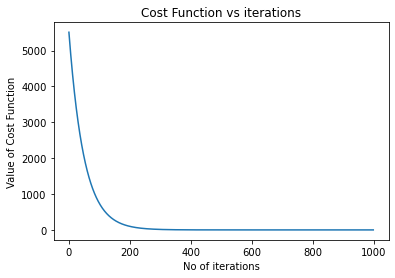

In [74]:
# Part a
# Parameter estimation through Gradient Descent
theta = np.zeros((X.shape[1],1))
alpha = 0.01
iterations = 1000
scale , X = GetScale(X)
cost,theta = CalculateGradientDescent(X,Y,theta,alpha,iterations)
print("Cost after " + str(iterations) + " iterations is: " + str(cost[iterations-1]))
for i in range(len(theta)):
    print("theta" + str(i) + ": " + str(theta[i]))

plt.plot(cost)
plt.title("Cost Function vs iterations")
plt.xlabel("No of iterations")
plt.ylabel("Value of Cost Function")
plt.show

In [76]:
# Part b
# Predicting Prices
XTest = np.array([[1, 2010],[1, 2020],[1, 2025]])
scaledX = scale.transform(XTest)
scaledX[:,0] = 1.0
YPredicted = CalculateHypothesis(scaledX,theta)
print("Predicted Prices are: ")
for i in range(len(YPredicted)):
    print("Predicted value against observation "  + str (XTest[i,1:]) + " is " + str(YPredicted[i]))

Predicted Prices are: 
Predicted value against observation [2010] is [166.96551885]
Predicted value against observation [2020] is [206.19109809]
Predicted value against observation [2025] is [225.80388771]
